# Car Prices Prediction | Machine Learning

The purpose of this notebook is to create a model that best represents car prices variation of a given dataset.


<font color="red">**This notebook is still a work in progress, feel free to send your comments/feedback or shoot a questions if you have some!**</font>

## Table of Contents

<font color="red">**Red marks represent work in progress**</font>

* <a href="#1">Importing Libraries and Dataset</a>

### Model Development

  * <a href="#2">Linear Regression</a>
  * <a href="#3">Multiple Linear Regression</a>
  * <a href="#4"> Polynomial Regression</a>
  * <a href="#5"> Ridge Regression</a>

<font color="red">
    
### Decision Making

### Conclusion

### References

</font>

<a id='1'></a>
## Importing Libraries and Dataset

In [1]:
#importing libraries
import pandas as pd #to Manipulate Dataframe

import numpy as np #to Calculate Arrays

import matplotlib.pyplot as plt #for visualization
plt.style.use(['ggplot']) #graphs style
%matplotlib inline 

import seaborn as sns #for visualization

from scipy import stats #for statistics

import warnings #to eliminate matplot warnings
warnings.filterwarnings('ignore')

# REGRESSIONS
from sklearn.linear_model import LinearRegression # Linear Regression Module

df = pd.read_csv(r'C:\Users\Marcello\Desktop\Projects\20190725_Car_Prices_Prediction\Github\clean_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(5)

,curb-weight,bore,price,highway-L/100km,d_whe_4wd,d_whe_fwd,d_whe_rwd,e_loc_front,e_loc_rear,n_cyl_5,n_cyl_4,n_cyl_rare,n_cyl_6,horsepower
0,2548,3.47,16500.0,8.703704,0,0,1,1,0,0,1,0,0,0
1,2823,2.68,16500.0,9.038462,0,0,1,1,0,0,0,0,1,1
2,2337,3.19,13950.0,7.833333,0,1,0,1,0,0,1,0,0,0
3,2824,3.19,17450.0,10.681818,1,0,0,1,0,1,0,0,0,0
4,2507,3.19,15250.0,9.400000,0,1,0,1,0,1,0,0,0,0


<a id='2'></a>
## Linear Regression 

<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable/features $X$</li>
    <li>The response/dependent variable/target (that we iswhat we want to predict)$Y$</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

 <b>Linear function is given by:</b>
$$
\hat{Y} = \theta_0 + \theta_{1}X
$$

<ul>
    <li>$\theta_0$ refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>$\theta_1$ refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


Let's start analysing which feature has more correlation with the response:

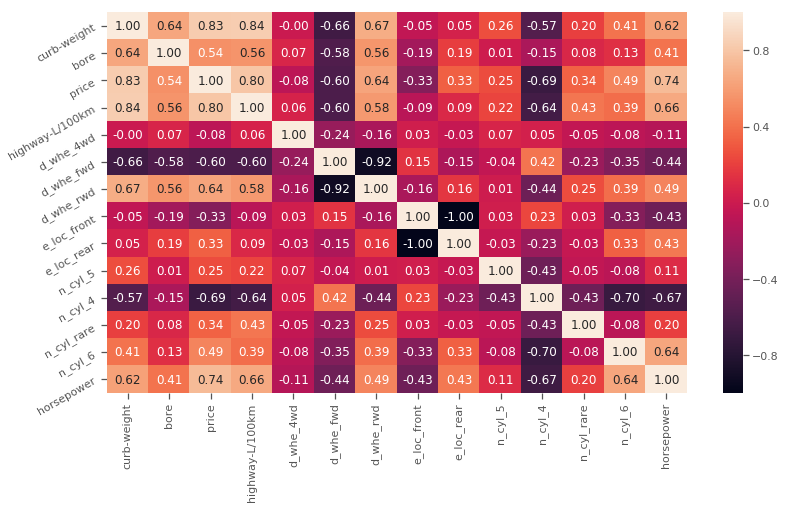

In [2]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

From the heatmap above we can conclude that curb-weight is the variable more correlated to price. Let's see how this feature can help us to predict the car prices for this example.

In [21]:
lm = LinearRegression() #creating linear regression object

X = df[['curb-weight']]
Y = df['price']

lm.fit(X,Y) #Fitting the linear model using curb-weight.

print('Intercept =',lm.intercept_)
print('Slope=',lm.coef_)

Intercept = -19555.643457210303
Slope= [12.8189026]


(0, 47860.819930166166)

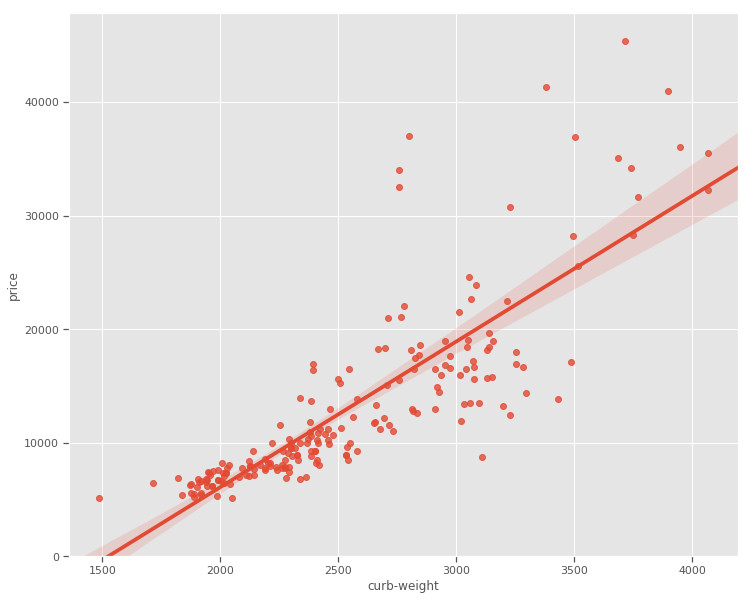

In [18]:
plt.figure(figsize=(12, 10))
sns.regplot(x='curb-weight', y='price', data=df)
plt.ylim(0,)

In [26]:
#curb-weight_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6962574620950065


<a id='3'></a>
##  Multi Linear Regression

<p>Let's try another methor to predict car price using more than one variable</p>

<p>
Multiple Linear Regression is very similar to a Single Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the regression models involve multiple predictors. Let's structure the model by using the following predictor variables, but these results can generalize to any integer:</p>

$$
\hat{Y}: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_n: Predictor\ Variable \ n\\

$$
$$
\theta_0: intercept\\
\theta_1 :coefficients \ of\ Variable \ 1\\
\theta_2: coefficients \ of\ Variable \ 2\\
\theta_3: coefficients \ of\ Variable \ 3\\
\theta_n: coefficients \ of\ Variable \ n\\
$$

 <b>Multi Linear function is given by:</b>
$$
\hat{Y} = \theta_{0} + \theta_{1}X + \theta_{2}X + \theta_{3}X + \theta_{n}X...
$$

In [23]:
# Let's develop a model using these variables as the predictor variables.
Z = df[['curb-weight', 'bore', 'highway-L/100km', 'd_whe_4wd',
       'd_whe_fwd', 'd_whe_rwd', 'e_loc_front', 'e_loc_rear', 'n_cyl_5',
       'n_cyl_4', 'n_cyl_rare', 'n_cyl_6', 'horsepower']] 

# Fit the linear model using the four above-mentioned variables.
lm.fit(Z, df['price'])

print('Intercept =',lm.intercept_)
print('Slope=',lm.coef_)

Intercept = -3874.510812482238
Slope= [ 8.23233378e+00 -2.53235745e+00  4.48327313e+02 -1.55917839e+03
  4.47874636e+02  1.11130375e+03 -6.87166423e+03  6.87166423e+03
  8.62074255e+02 -2.77622966e+03  3.06243049e+03 -1.14827509e+03
  2.27697970e+03]


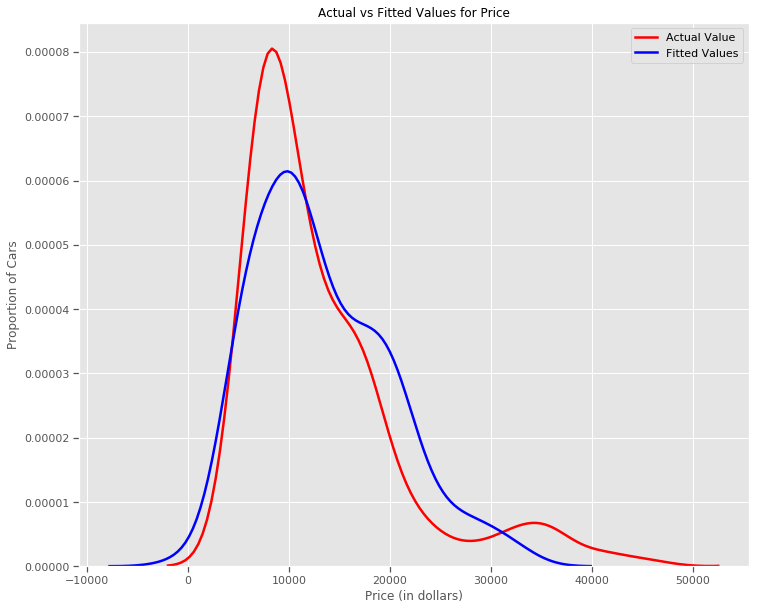

In [25]:
Y_hat = lm.predict(Z)

plt.figure(figsize=(12, 10))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [27]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8467072148509164
